In [2]:
import os
from glob import glob
from pathlib import Path

cwd = Path.cwd()
print(cwd)
prepped_data_dir = cwd / "PreppedData"

# If current path does not end in "PreppedData", move into it
if cwd.name != "PreppedData":
    if prepped_data_dir.exists():
        os.chdir(prepped_data_dir)
        print(f"Changed working directory to: {prepped_data_dir}")
    else:
        raise FileNotFoundError(f"'Annotations' directory not found at: {prepped_data_dir}")
else:
    print(f"Already in {cwd.name} directory.")

/home/fs1620/MLBD_2024_25/Research_Project/LiaDataAnalysis
Changed working directory to: /home/fs1620/MLBD_2024_25/Research_Project/LiaDataAnalysis/PreppedData


In [3]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import numpy as np
from collections import Counter

n_split = 5
shuffle = True
random_state = 42

data = np.load('combined_logmed_transformed.npz')
X = data['X']
y = data['y']
display(X)
print(Counter(y))
print(X.shape, y.shape)
print(np.unique(y))

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
folds = []
for i, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    folds.append({'fold': i+1, 'train_idx': train_idx, 'val_idx': val_idx})

array([[-0.00021589, -0.00021589, -0.00021589, ..., -0.00021589,
        -0.00021589, -0.00021589],
       [-0.00021602, -0.00021602, -0.00021602, ..., -0.00021602,
        -0.00021602, -0.00021602],
       [-0.00023529, -0.00023529, -0.00023529, ..., -0.00023529,
        -0.00023529, -0.00023529],
       ...,
       [-0.00026413, -0.00026413, -0.00026413, ..., -0.00018941,
        -0.00026413, -0.00026413],
       [-0.00026318, -0.00026318, -0.00026318, ..., -0.0001802 ,
        -0.00026318, -0.00026318],
       [-0.00025636, -0.00025636, -0.00025636, ..., -0.00025636,
        -0.00025636, -0.00025636]])

Counter({np.int64(0): 1637, np.int64(1): 895, np.int64(2): 363, np.int64(4): 97, np.int64(3): 73})
(3065, 2947) (3065,)
[0 1 2 3 4]


In [4]:
for fold in folds:
    train_idx = fold['train_idx']
    val_idx = fold['val_idx']
    
    # Check if train and val indices overlap
    overlap = set(train_idx).intersection(val_idx)
    if len(overlap) > 0:
        print(f"Warning: Overlap found in fold {fold['fold']} indices: {overlap}")
    else:
        print(f"No overlap in fold {fold['fold']} indices.")

No overlap in fold 1 indices.
No overlap in fold 2 indices.
No overlap in fold 3 indices.
No overlap in fold 4 indices.
No overlap in fold 5 indices.



Fold 1
 Train labels: Counter({np.int64(0): 1309, np.int64(1): 716, np.int64(2): 290, np.int64(4): 78, np.int64(3): 59})
 Val   labels: Counter({np.int64(0): 328, np.int64(1): 179, np.int64(2): 73, np.int64(4): 19, np.int64(3): 14})
PCA comps: 810,  var=0.9501
Dummy — Acc: 0.5351, Bal-Acc: 0.2000
NN    — Acc: 0.7863, Bal-Acc: 0.5684


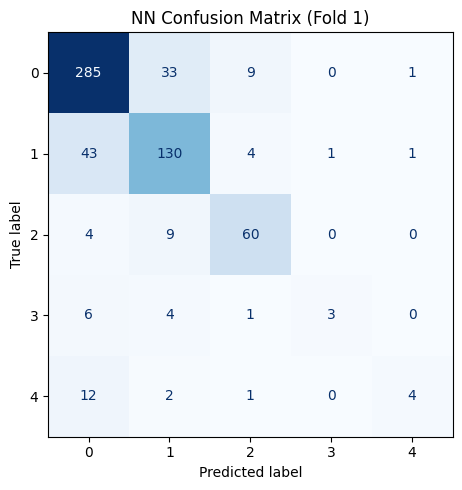


Fold 2
 Train labels: Counter({np.int64(0): 1309, np.int64(1): 716, np.int64(2): 290, np.int64(4): 78, np.int64(3): 59})
 Val   labels: Counter({np.int64(0): 328, np.int64(1): 179, np.int64(2): 73, np.int64(4): 19, np.int64(3): 14})
PCA comps: 807,  var=0.9501
Dummy — Acc: 0.5351, Bal-Acc: 0.2000
NN    — Acc: 0.7847, Bal-Acc: 0.5624


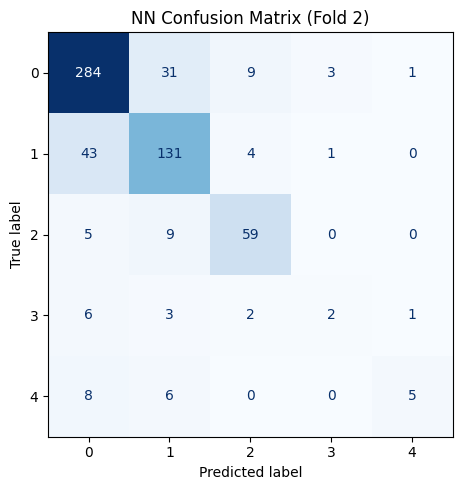


Fold 3
 Train labels: Counter({np.int64(0): 1310, np.int64(1): 716, np.int64(2): 290, np.int64(4): 78, np.int64(3): 58})
 Val   labels: Counter({np.int64(0): 327, np.int64(1): 179, np.int64(2): 73, np.int64(4): 19, np.int64(3): 15})
PCA comps: 816,  var=0.9500
Dummy — Acc: 0.5334, Bal-Acc: 0.2000
NN    — Acc: 0.8026, Bal-Acc: 0.5403


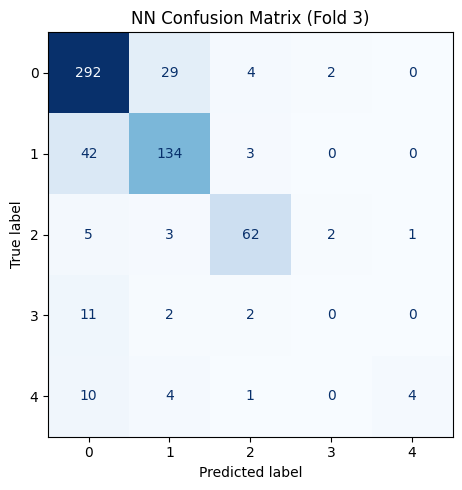


Fold 4
 Train labels: Counter({np.int64(0): 1310, np.int64(1): 716, np.int64(2): 291, np.int64(4): 77, np.int64(3): 58})
 Val   labels: Counter({np.int64(0): 327, np.int64(1): 179, np.int64(2): 72, np.int64(4): 20, np.int64(3): 15})
PCA comps: 811,  var=0.9501
Dummy — Acc: 0.5334, Bal-Acc: 0.2000
NN    — Acc: 0.7879, Bal-Acc: 0.5506


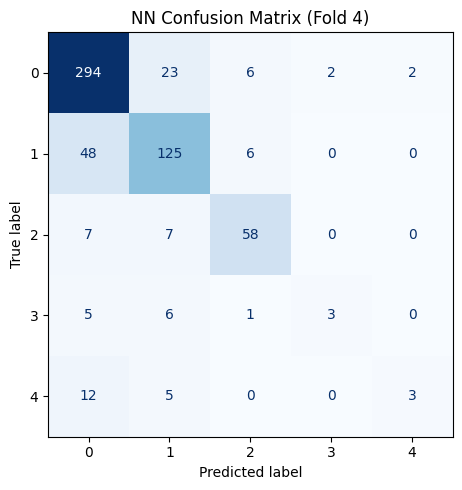


Fold 5
 Train labels: Counter({np.int64(0): 1310, np.int64(1): 716, np.int64(2): 291, np.int64(4): 77, np.int64(3): 58})
 Val   labels: Counter({np.int64(0): 327, np.int64(1): 179, np.int64(2): 72, np.int64(4): 20, np.int64(3): 15})
PCA comps: 809,  var=0.9501
Dummy — Acc: 0.5334, Bal-Acc: 0.2000
NN    — Acc: 0.7879, Bal-Acc: 0.5431


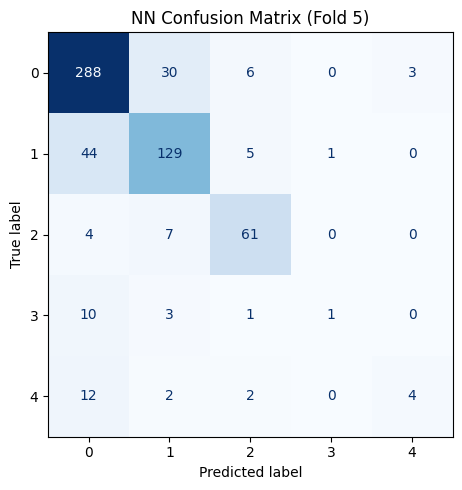


=== Summary ===
Dummy — Mean Acc:       0.5341 ± 0.0008
Dummy — Mean Bal-Acc:   0.2000 ± 0.0000
NN    — Mean Acc:       0.7899 ± 0.0065
NN    — Mean Bal-Acc:   0.5529 ± 0.0109


In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing      import StandardScaler
from sklearn.decomposition       import PCA
from sklearn.dummy               import DummyClassifier
from sklearn.metrics             import (
    accuracy_score, balanced_accuracy_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from collections                 import Counter
import numpy as np

# ---- Settings ----
use_shuffled_labels = False
use_pca             = True
pca_variance        = 0.95

dummy_accs    = []
dummy_baccs   = []
nn_accs       = []
nn_baccs      = []

for fold in folds:
    train_idx, val_idx = fold['train_idx'], fold['val_idx']
    X_train, X_val     = X[train_idx], X[val_idx]
    y_train, y_val     = y[train_idx], y[val_idx]

    if use_shuffled_labels:
        rng = np.random.default_rng(seed=fold['fold'])
        y_train = rng.permutation(y_train)

    print(f"\nFold {fold['fold']}")
    print(" Train labels:", Counter(y_train))
    print(" Val   labels:", Counter(y_val))

    # ---- Standardization ----
    scaler    = StandardScaler()
    X_tr_s    = scaler.fit_transform(X_train)
    X_val_s   = scaler.transform(X_val)

    # ---- PCA (optional) ----
    if use_pca:
        pca    = PCA(n_components=pca_variance)
        X_tr_p = pca.fit_transform(X_tr_s)
        X_val_p= pca.transform(X_val_s)
        print(f"PCA comps: {pca.n_components_},  var={pca.explained_variance_ratio_.sum():.4f}")
    else:
        X_tr_p, X_val_p = X_tr_s, X_val_s

    # ---- Dummy Baseline ----
    dummy = DummyClassifier(strategy='most_frequent')
    dummy.fit(X_tr_p, y_train)
    y_dummy     = dummy.predict(X_val_p)
    acc_dummy   = accuracy_score(y_val, y_dummy)
    bacc_dummy  = balanced_accuracy_score(y_val, y_dummy)
    dummy_accs.append(acc_dummy)
    dummy_baccs.append(bacc_dummy)

    # ---- Simple Neural Network ----
    nn = MLPClassifier(
        hidden_layer_sizes=(100, 50, 25),  # three hidden layers
        activation='relu',
        solver='adam',
        alpha=1e-4,                        # L2 penalty (regularization)
        batch_size='auto',
        learning_rate='adaptive',
        max_iter=300,
        random_state=fold['fold'],
        verbose=False
    )
    nn.fit(X_tr_p, y_train)
    y_nn        = nn.predict(X_val_p)
    acc_nn      = accuracy_score(y_val, y_nn)
    bacc_nn     = balanced_accuracy_score(y_val, y_nn)
    nn_accs.append(acc_nn)
    nn_baccs.append(bacc_nn)

    print(f"Dummy — Acc: {acc_dummy:.4f}, Bal-Acc: {bacc_dummy:.4f}")
    print(f"NN    — Acc: {acc_nn:.4f}, Bal-Acc: {bacc_nn:.4f}")

    # ---- Confusion Matrix for NN ----
    cm   = confusion_matrix(y_val, y_nn, labels=np.unique(y))
    disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y))
    fig, ax = plt.subplots(figsize=(6,5))
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(f'NN Confusion Matrix (Fold {fold["fold"]})')
    plt.tight_layout()
    plt.show()
    plt.close()

# ---- Summary ----
print("\n=== Summary ===")
print(f"Dummy — Mean Acc:       {np.mean(dummy_accs):.4f} ± {np.std(dummy_accs):.4f}")
print(f"Dummy — Mean Bal-Acc:   {np.mean(dummy_baccs):.4f} ± {np.std(dummy_baccs):.4f}")
print(f"NN    — Mean Acc:       {np.mean(nn_accs):.4f} ± {np.std(nn_accs):.4f}")
print(f"NN    — Mean Bal-Acc:   {np.mean(nn_baccs):.4f} ± {np.std(nn_baccs):.4f}")